In [13]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

In [11]:
wine = datasets.load_wine(as_frame=True)
wine['data'].head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


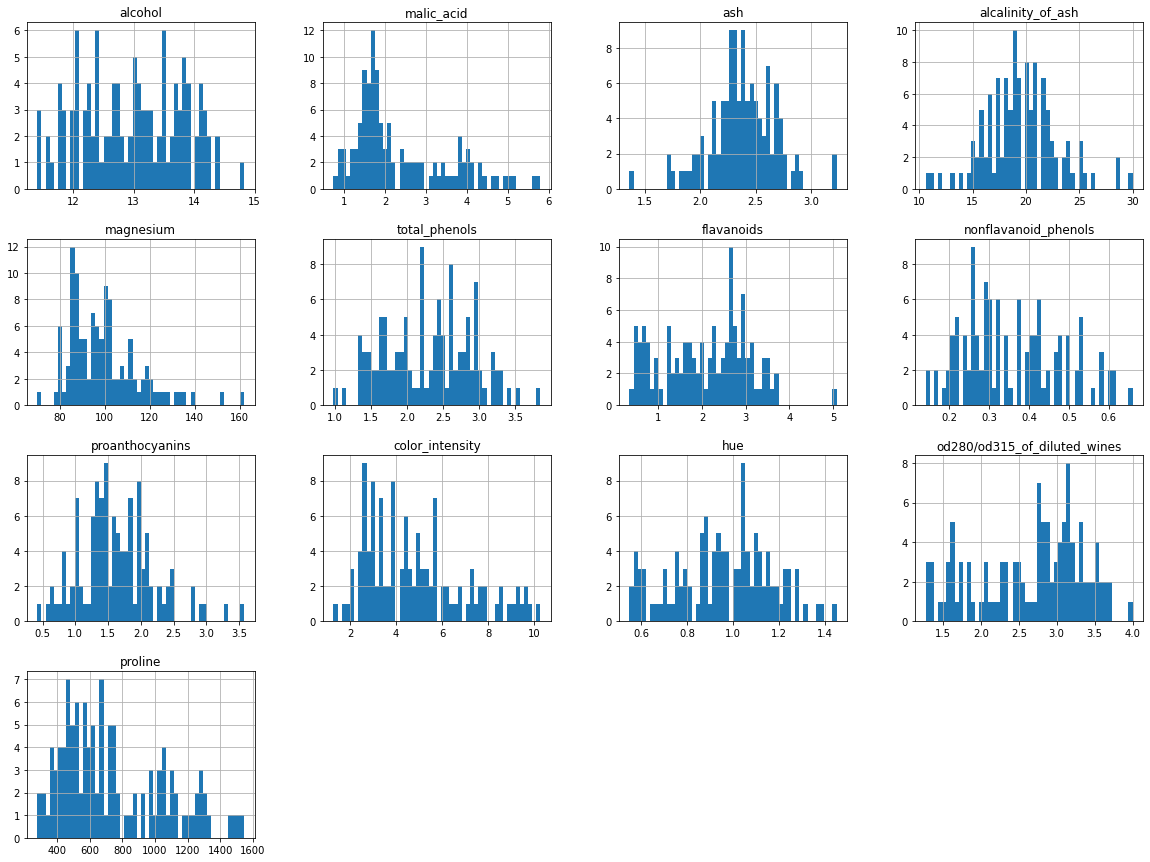

In [45]:
X = wine.data.copy()
y = wine.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

X_train.hist(figsize=(20,15), bins=50)
plt.show()

In [46]:
from sklearn.model_selection import cross_val_score

svm_clf = Pipeline(steps=[
("scaler", StandardScaler()),
("linear_svc", LinearSVC(C=1, loss="hinge", max_iter=10000)),
])

scores = cross_val_score(svm_clf, X_train, y_train, cv=5)

print(scores)

[1.         1.         0.95652174 0.95652174 1.        ]


In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'linear_svc__C': [1, 10, 100]}
]

grid_search = GridSearchCV(
    svm_clf,
    param_grid, cv = 5,
    scoring = 'accuracy',
    return_train_score=True
)
grid_search.fit(X_train, y_train)

results = grid_search.cv_results_
print(f'best score and params: {grid_search.best_score_:.3f}, {grid_search.best_params_}')
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(f'score {mean_score:.3f}, params {params}')


best score and params: 0.991, {'linear_svc__C': 10}
score 0.983, params {'linear_svc__C': 1}
score 0.991, params {'linear_svc__C': 10}
score 0.991, params {'linear_svc__C': 100}


In [48]:
from sklearn.metrics import accuracy_score

y_predicted = grid_search.best_estimator_.predict(X_test)

acc_score = np.sqrt(
    accuracy_score(y_predicted, y_test)
)
print(f"test set accuracy_score: {acc_score:.3f}")

test set accuracy_score: 0.992
